In [280]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Read the input file and check the data dimension

In [281]:
data_df = pd.read_csv("german_credit.csv")

In [282]:
# You can access from https://www.kaggle.com/uciml/german-credit
#Read input file and understand the data
# "default" is my dependent variable
data_df.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [283]:
data_df.shape

(1000, 21)

In [284]:
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
default,1000.0,0.300,0.458487,0.0,0.0,0.0,1.00,1.0
duration_in_month,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
credit_amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
installment_as_income_perc,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
present_res_since,1000.0,2.845,1.103718,1.0,2.0,3.0,4.00,4.0
age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
credits_this_bank,1000.0,1.407,0.577654,1.0,1.0,1.0,2.00,4.0
people_under_maintenance,1000.0,1.155,0.362086,1.0,1.0,1.0,1.00,2.0


In [285]:
data_df.columns

Index(['default', 'account_check_status', 'duration_in_month',
       'credit_history', 'purpose', 'credit_amount', 'savings',
       'present_emp_since', 'installment_as_income_perc',
       'personal_status_sex', 'other_debtors', 'present_res_since', 'property',
       'age', 'other_installment_plans', 'housing', 'credits_this_bank', 'job',
       'people_under_maintenance', 'telephone', 'foreign_worker'],
      dtype='object')

### Q1 Randomly select 50% data for this use case( 1 Marks)
###### Hint: Use train_test_split

In [286]:
from sklearn.model_selection import train_test_split

In [287]:
# Lets build a Ensemble model but need to modify the dataset first
x_data_random, X_test_random, y_data_random, Y_test_random = train_test_split(data_df.iloc[:,1:],data_df.iloc[:,0],train_size=0.5)

In [288]:
x_data_random.shape

(500, 20)

### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [289]:
# Print Shape of model data
x_data=pd.get_dummies(x_data_random)
x_data.shape

(500, 61)

### Check for highly correlated variables but don't required any treatment for this use case

In [290]:
x_data.corr().abs()

,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,account_check_status_>= 200 DM / salary assignments for at least 1 year,...,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
duration_in_month,1.000000,0.604399,0.052378,0.011278,0.051965,0.016409,2.538706e-02,0.023769,0.025185,0.073784,...,0.070575,0.089374,0.145848,0.065889,0.111334,0.183444,0.145136,0.145136,1.228056e-01,0.122806
credit_amount,0.604399,1.000000,0.271437,0.004732,0.007955,0.056067,6.002595e-03,0.083202,0.017090,0.100024,...,0.125582,0.000037,0.299137,0.071864,0.011104,0.191777,0.257576,0.257576,3.375718e-02,0.033757
installment_as_income_perc,0.052378,0.271437,1.000000,0.017944,0.100866,0.032945,4.653176e-02,0.004189,0.031372,0.027242,...,0.082423,0.141402,0.062605,0.022405,0.119797,0.001600,0.025274,0.025274,1.175635e-01,0.117564
present_res_since,0.011278,0.004732,0.017944,1.000000,0.239705,0.102334,1.029148e-01,0.062246,0.052138,0.008969,...,0.260318,0.150139,0.033408,0.030464,0.089985,0.018327,0.084401,0.084401,4.558970e-02,0.045590
age,0.051965,0.007955,0.100866,0.239705,1.000000,0.092578,1.335166e-01,0.034089,0.047059,0.089976,...,0.067548,0.251849,0.147024,0.145198,0.043466,0.027646,0.171885,0.171885,2.976601e-03,0.002977
credits_this_bank,0.016409,0.056067,0.032945,0.102334,0.092578,1.000000,7.601991e-02,0.100444,0.012457,0.039901,...,0.068979,0.078774,0.020320,0.004198,0.046122,0.011326,0.062707,0.062707,2.383069e-02,0.023831
people_under_maintenance,0.025387,0.006003,0.046532,0.102915,0.133517,0.076020,1.000000e+00,0.111673,0.061811,0.038277,...,0.023613,0.074734,0.025219,0.104093,0.002004,0.101439,0.039104,0.039104,4.463548e-02,0.044635
account_check_status_0 <= ... < 200 DM,0.023769,0.083202,0.004189,0.062246,0.034089,0.100444,1.116729e-01,1.000000,0.363455,0.142497,...,0.017509,0.000872,0.104752,0.108401,0.020756,0.039575,0.003244,0.003244,5.178544e-02,0.051785
account_check_status_< 0 DM,0.025185,0.017090,0.031372,0.052138,0.047059,0.012457,6.181135e-02,0.363455,1.000000,0.157044,...,0.135034,0.087311,0.020673,0.044699,0.011544,0.037842,0.036572,0.036572,1.448464e-02,0.014485
account_check_status_>= 200 DM / salary assignments for at least 1 year,0.073784,0.100024,0.027242,0.008969,0.089976,0.039901,3.827672e-02,0.142497,0.157044,1.000000,...,0.012244,0.025993,0.041715,0.002393,0.208399,0.020607,0.030909,0.030909,5.211619e-02,0.052116


### Drop the original variables which are converted to dummy

In [291]:
X = pd.get_dummies(x_data_random, drop_first=True)
X.shape

(500, 48)

In [292]:
Y = y_data_random #saving 50% random dependent variable data

### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [293]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [294]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [295]:
rfc = RandomForestClassifier(n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999)
rfc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
                       oob_score=False, random_state=9999, verbose=0,
                       warm_start=False)

### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [296]:
y_pred = rfc.predict(x_test)

In [297]:
accuracy_score(y_test, y_pred)

0.74

In [298]:
print(confusion_matrix(y_test, y_pred))

[[98 11]
 [28 13]]


### Q6 Show the list of the features importance( 1 Marks)

In [299]:
print(rfc.feature_importances_)

[0.09406955 0.10949952 0.03552431 0.03896662 0.09196604 0.02155981
 0.01219071 0.03337969 0.009055   0.06425474 0.02453876 0.01340426
 0.01515272 0.02003332 0.0095286  0.0190595  0.00906477 0.01839355
 0.00327091 0.00194154 0.01626507 0.0007443  0.00106058 0.02227932
 0.01085423 0.00808496 0.01680783 0.02760715 0.01726391 0.01526837
 0.0086922  0.0071857  0.00822362 0.01647193 0.01042937 0.01387021
 0.01664259 0.01553352 0.01290743 0.02157359 0.00419563 0.01416174
 0.01218627 0.01949852 0.00212668 0.01235313 0.01828566 0.00457255]


### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [300]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict

In [301]:
# Use below values
num_folds = 10
seed = 77

In [302]:
#Validate the Random Forest model build above using k fold

In [303]:
kf = KFold(num_folds, random_state=seed)
rfc = RandomForestClassifier(n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999)

In [304]:
final_confusion_matrix = [[0],[0]]
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index] 
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
    rfc.fit(X_train, Y_train)
    final_confusion_matrix = final_confusion_matrix + confusion_matrix(Y_test, rfc.predict(X_test))

In [305]:
cv_score = cross_val_score(rfc,X,y_data_random,cv=kf)

In [306]:
#Calculate Mean score

In [307]:
cv_score.mean()

0.742

In [308]:
# Calculate score standard deviation using std()

In [309]:
cv_score.std()

0.06289674077406554

# Q8 Print the confusion matrix( 1 Marks)

In [310]:
final_confusion_matrix

array([[317,  31],
       [ 98,  54]], dtype=int64)

# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
( 1 Marks)

In [311]:
TP = final_confusion_matrix[0][0]
TN = final_confusion_matrix[1][1]
FP = final_confusion_matrix[0][1]
FN = final_confusion_matrix[1][0]

In [312]:
print("Recall for 0 : %.2f" %(TP/(TP+FP)))
print("Precision for 0 : %.2f" %(TP/(TP+FN)))
print("Recall for 1 : %.2f" %(TN/(TN+FN)))
print("Precision for 1 : %.2f" %(TN/(TN+FP)))

Recall for 0 : 0.91
Precision for 0 : 0.76
Recall for 1 : 0.36
Precision for 1 : 0.64


# Q10.Plot Receiver Operating Characteristic (ROC) Curves( 1 Marks)

In [313]:
#Hint: Use roc_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
%matplotlib inline

In [314]:
probs = rfc.predict_proba(x_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
fpr, tpr, thresholds = roc_curve(y_test, probs)

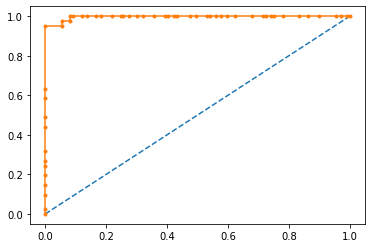

In [315]:
pyplot.plot([0, 1], [0, 1], linestyle='--')
pyplot.plot(fpr, tpr, marker='.')
pyplot.show()

ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context

# Q11. Calculate AUC(the percentage of the ROC plot that is underneath the curve) - optional

### Bootstrapping ( Bonus)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [316]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [317]:
accuracy = np.array(accuracy)
print('Accuracy Score')
print('Avearge: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())

Accuracy Score
Avearge:  nan
Standard deviation:  nan
